In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense



In [66]:
date_rng=['20-02-2023','21-02-2023','22-02-2023','23-02-2023','24-02-2023','25-02-2023','26-02-2023','27-02-2023']
sales_data=[20,22,30,31,32,35,37,38]

data=pd.DataFrame({'date':date_rng,'sales':sales_data})
data=data.set_index("date")
print(data)


#normalize the sales data
scaler=MinMaxScaler()
data['sales']=scaler.fit_transform(data['sales'].values.reshape(-1,1))
# print(data['sales'])
data


            sales
date             
20-02-2023     20
21-02-2023     22
22-02-2023     30
23-02-2023     31
24-02-2023     32
25-02-2023     35
26-02-2023     37
27-02-2023     38


,sales
date,
20-02-2023,0.000000
21-02-2023,0.111111
22-02-2023,0.555556
23-02-2023,0.611111
24-02-2023,0.666667
25-02-2023,0.833333
26-02-2023,0.944444
27-02-2023,1.000000


In [67]:
#split the data

train_size=int(len(data)*0.7)
train_data,test_data=data[:train_size],data[train_size:]

print(train_data)
print(test_data)

               sales
date                
20-02-2023  0.000000
21-02-2023  0.111111
22-02-2023  0.555556
23-02-2023  0.611111
24-02-2023  0.666667
               sales
date                
25-02-2023  0.833333
26-02-2023  0.944444
27-02-2023  1.000000


In [68]:
#create sequences

def create_sequence(data,sequence_length):
    sequences,labels=[],[]
    for i in range(len(data)-sequence_length):
        sequence=data.iloc[i:i+sequence_length]['sales']
        target=data.iloc[i+sequence_length]['sales']
        sequences.append(sequence)
        labels.append(target)
        print('sequence:{}'.format(sequence))
        print("labels:{}".format(target))
    return np.array(sequences), np.array(labels)

In [69]:
sequence_length=1
x_train, y_train=create_sequence(train_data,sequence_length)
x_test,y_test=create_sequence(test_data,sequence_length)

sequence:date
20-02-2023    0.0
Name: sales, dtype: float64
labels:0.11111111111111094
sequence:date
21-02-2023    0.111111
Name: sales, dtype: float64
labels:0.5555555555555554
sequence:date
22-02-2023    0.555556
Name: sales, dtype: float64
labels:0.6111111111111109
sequence:date
23-02-2023    0.611111
Name: sales, dtype: float64
labels:0.6666666666666665
sequence:date
25-02-2023    0.833333
Name: sales, dtype: float64
labels:0.9444444444444442
sequence:date
26-02-2023    0.944444
Name: sales, dtype: float64
labels:1.0


In [70]:
#build the lstm

model=Sequential()
model.add(LSTM(50, activation='relu', input_shape=(sequence_length,1)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mean_squared_error')


In [71]:
#train the model

model.fit(x_train,y_train,epochs=100,batch_size=2)

Epoch 1/100
2/2 [==============================] - 5s 8ms/step - loss: 0.2826
Epoch 2/100
2/2 [==============================] - 0s 20ms/step - loss: 0.2782
Epoch 3/100
2/2 [==============================] - 0s 17ms/step - loss: 0.2730
Epoch 4/100
2/2 [==============================] - 0s 11ms/step - loss: 0.2674
Epoch 5/100
2/2 [==============================] - 0s 14ms/step - loss: 0.2635
Epoch 6/100
2/2 [==============================] - 0s 14ms/step - loss: 0.2588
Epoch 7/100
2/2 [==============================] - 0s 10ms/step - loss: 0.2543
Epoch 8/100
2/2 [==============================] - 0s 14ms/step - loss: 0.2489
Epoch 9/100
2/2 [==============================] - 0s 9ms/step - loss: 0.2448
Epoch 10/100
2/2 [==============================] - 0s 10ms/step - loss: 0.2400
Epoch 11/100
2/2 [==============================] - 0s 8ms/step - loss: 0.2364
Epoch 12/100
2/2 [==============================] - 0s 10ms/step - loss: 0.2316
Epoch 13/100
2/2 [==============================] - 

In [72]:
#make predictions
type(x_test)
predicted_sales=model.predict(x_test)

1/1 [==============================] - 1s 692ms/step


In [73]:
#inverse transform

predicted_sales=scaler.inverse_transform(predicted_sales)
actual_sales=scaler.inverse_transform(test_data['sales'][sequence_length:].to_numpy().reshape(-1,1))
print()

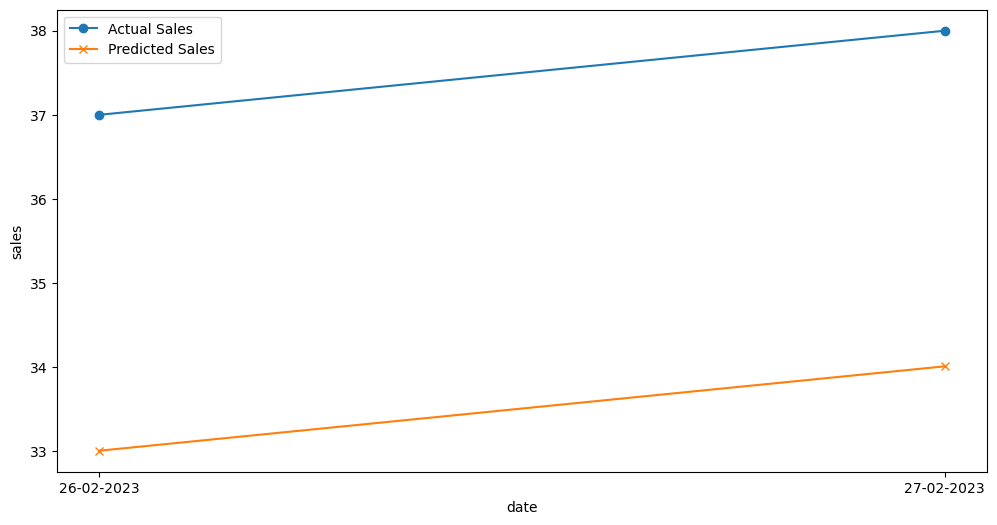

In [74]:
# plot the actual vs predicted sales
plt.figure(figsize=(12,6))
plt.plot(test_data.index[sequence_length:],actual_sales,label='Actual Sales', marker='o')
plt.plot(test_data.index[sequence_length:],predicted_sales,label='Predicted Sales', marker='x')
plt.xlabel('date')
plt.ylabel('sales')
plt.legend()
plt.show()